In [3]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K
K.set_image_dim_ordering('tf')


AttributeError: module 'keras.backend' has no attribute 'set_image_dim_ordering'

In [11]:
from keras.datasets import cifar10
# let's load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [12]:
#normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [13]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [14]:
# Create the model 
model = Sequential()

In [15]:
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [17]:
# Compile model 
epochs=50
lrate = 0.01 
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
1563/1563 [==============================] - 6519s 4s/step - loss: 1.8741 - accuracy: 0.3045 - val_loss: 1.5128 - val_accuracy: 0.4324
Epoch 2/50
1563/1563 [==============================] - 426s 273ms/step - loss: 1.4244 - accuracy: 0.4817 - val_loss: 1.2325 - val_accuracy: 0.5526
Epoch 3/50
1563/1563 [==============================] - 414s 265ms/step - loss: 1.1925 - accuracy: 0.5707 - val_loss: 1.0556 - val_accuracy: 0.6170
Epoch 4/50
1563/1563 [==============================] - 394s 252ms/step - loss: 1.0241 - accuracy: 0.6349 - val_loss: 0.9004 - val_accuracy: 0.6870
Epoch 5/50
1563/1563 [==============================] - 398s 254ms/step - loss: 0.8943 - accuracy: 0.6840 - val_loss: 0.8373 - val_accuracy: 0.7072
Epoch 6/50
1563/1563 [==============================] - 417s 267ms/step - loss: 0.8039 - accuracy: 0.7173 - val_loss: 0.7641 - val_accuracy: 0.7364
Epoch 7/50
1563/1563 [==============================] - 394s 252ms/step - loss: 0.7225 - accuracy: 0.7441 - val_lo

In [19]:
from keras.models import load_model 
model.save('project_model.h5')

In [20]:
#loading the saved model 
from keras.models import load_model 
model = load_model('project_model.h5')

In [36]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\Automobile.jpg",target_size =(32,32))

In [41]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 1s 502ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Automobile


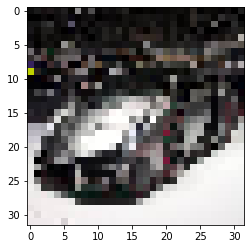

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [46]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\truck.jpg",target_size =(32,32))

In [47]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 40ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Truck


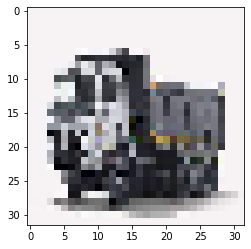

In [48]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [49]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\Aeroplane.jpg",target_size =(32,32))

In [50]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 32ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Aeroplane


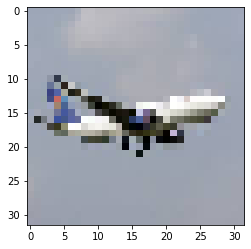

In [51]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [52]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\Ship.jpg",target_size =(32,32))

In [53]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 40ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Ship


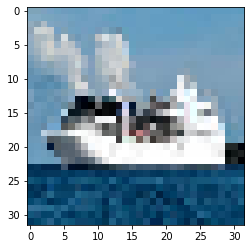

In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [61]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\Bird.jpg",target_size =(32,32))
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 32ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bird


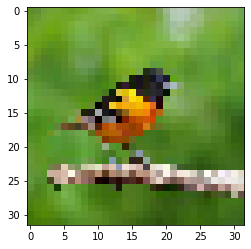

In [62]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [63]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\horse.jpg",target_size =(32,32))
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Horse


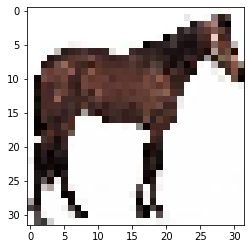

In [64]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [65]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\frog.jpg",target_size =(32,32))
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Frog


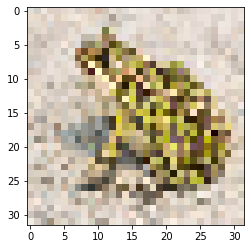

In [66]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [68]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\ccaty.jpg",target_size =(32,32))
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 40ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Cat


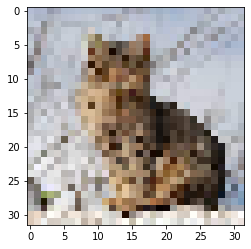

In [69]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)

In [71]:
import numpy as np 
import keras
import tensorflow as tf
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =keras.utils.load_img(r"E:\Desktop\df.jpg",target_size =(32,32))
test_image =tf.keras.preprocessing.image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Deer


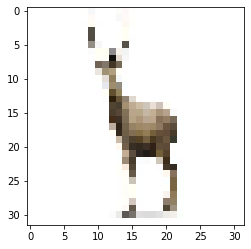

In [72]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)